## Grating Efficiency Measurements Using a Monochromator and Photometer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

#win
datastore_path="c:/cloudstor/datastore/grating-efficiency/"

In [2]:
def open_meas(str):
    with open(file, 'r') as f:
        file2list = pd.read_csv(f,header=None,delimiter='\t')
    
    return file2list

In [3]:
def PD1PD2_ratio(file2list):
    return (file2list[2]/file2list[4]).mean()

In [4]:
def PD2PD1_ratio(file2list):
    return (file2list[4]/file2list[2]).mean()

In [5]:
def PD1(file):
    with open(file, 'r') as f:
        file2list = pd.read_csv(f,header=None,delimiter='\t')
    
    return(file2list[2])

In [6]:
def PD2(file):
    with open(file, 'r') as f:
        file2list = pd.read_csv(f,header=None,delimiter='\t')
    
    return(file2list[4])

In [7]:
def Power_level(str_run, measno, PD):
    disp_list =[]
    print(str_run)
    print(u'Power levels for PD' + str(PD) + ' \u03BCW vs. wavelength')
    with open(datastore_path + str_run + "/measure"+ str(measno) + ".txt", 'r') as f:
        disp_list = pd.read_csv(f,header=None,delimiter='\t')
        
    t= np.arange(0,len(disp_list),1)
    if PD == 1:
        file_plot = plt.plot(t,(np.array(disp_list[2])*1000000))
    elif PD == 2:
        file_plot = plt.plot(t,(np.array(disp_list[4])*1000000))
    plt.title(str_run + u'\nPower levels for PDs \u03BCW vs. wavelength')
    plt.legend(file_plot, str(measno), loc='best')
    #print(disp_list)

In [8]:
def Power_level_both(str_run):
    disp_list =[]
    disp_list2 = []
    for filestring in (glob.glob(datastore_path + str_run + "/*.txt")):
        disp_list.append(PD1_mean(filestring))
        disp_list2.append(PD2_mean(filestring))

    t= np.arange(0,len(disp_list),1)
    t2= np.arange(0,len(disp_list2),1)
    file_mean, = plt.plot(t,(np.array(disp_list)*1000000),color='blue')
    #print(disp_list)
    #print(disp_list2)
    file_mean2, = plt.plot(t2,(np.array(disp_list2)*1000000),color='red')
    plt.title(str_run + u'\nPower levels for PDs \u03BCW vs. minutes')
    plt.legend([file_mean,file_mean2],['PD1','PD2'],loc='best')
    #print(disp_list)

## Power level of Monochromator
- A Laser Driven Light Source (LDLS) produces white light and measures at ~70 mW from the end of a 230 $\mu$m fiber with 0.22 NA
- the LDLS is couple directly to a Bausch & Lomb monochromator that has been refurbished to couple fibers
- the monochromator has 1350 grooves/mm and 500 nm blaze
- the monochromator output fiber is a Thorlabs GIF625. 62.5 $\mu$m with 0.275 NA
- power level from the 62.5 $\mu$m fiber peaks in the blue at 0.36 $\mu$W. nanometer reading (9572)
- power levels are measured using a Thorlabs Dual Channel Power and Energy Meter (PM320E) with two S120C photodiodes attached

### measurements

- for the first test, we attach the multimode output fiber to a Thorlabs 90$^o$ Off-axis Parabola that collimates a 4 mm beam
- the beam is shone on the channel 1 photodiode (S/N 14120241) set to 10 $\mu$W scale and sampling at 15 times per second


monochromator_cal_run26
Power levels for PD1 μW vs. wavelength


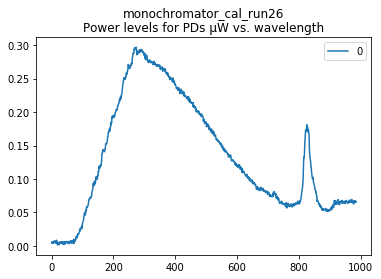

In [9]:
#read in csv file

run = "monochromator_cal_run26"
Power_level(run,0,1)

## Power level measurements through the grating at an off plane angle at Pos 2

### measurements

monochromator_pos2_nosplitter_run27
Power levels for PD1 μW vs. wavelength


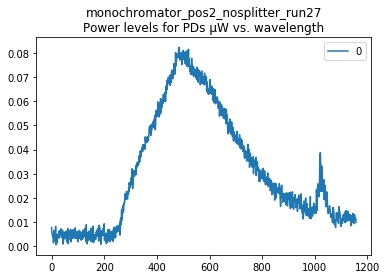

In [10]:
run = "monochromator_pos2_nosplitter_run27"
Power_level(run,0,1)


monochromator_pos5_nosplitter_run28
Power levels for PD1 μW vs. wavelength


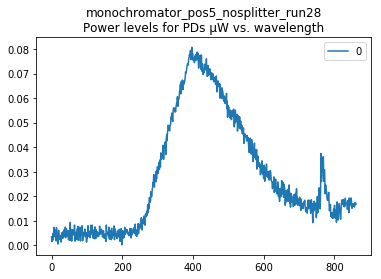

In [11]:
run = "monochromator_pos5_nosplitter_run28"
Power_level(run,0,1)